# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [4]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : codrington
Processing Record 2 of Set 1 : cabo san lucas
Processing Record 3 of Set 1 : tuktoyaktuk
Processing Record 4 of Set 1 : kaitangata
City not found. Skipping...
Processing Record 5 of Set 1 : kudahuvadhoo
Processing Record 6 of Set 1 : thinadhoo
Processing Record 7 of Set 1 : bonthe
Processing Record 8 of Set 1 : mastic beach
Processing Record 9 of Set 1 : rikitea
Processing Record 10 of Set 1 : bluff
Processing Record 11 of Set 1 : chernyshevskiy
Processing Record 12 of Set 1 : dikson
Processing Record 13 of Set 1 : busselton
Processing Record 14 of Set 1 : upernavik
Processing Record 15 of Set 1 : albany
Processing Record 16 of Set 1 : la ronge
Processing Record 17 of Set 1 : ponta do sol
City not found. Skipping...
Processing Record 18 of Set 1 : egvekinot
Processing Record 19 of Set 1 : adre
Processing Record 20 of Set 1 : bredasdorp
Processing Record 21 of Set 1 : milyutinskaya
Processi

Processing Record 36 of Set 4 : te anau
Processing Record 37 of Set 4 : usogorsk
Processing Record 38 of Set 4 : beira
Processing Record 39 of Set 4 : buala
Processing Record 40 of Set 4 : appleton
Processing Record 41 of Set 4 : markova
Processing Record 42 of Set 4 : bambous virieux
City not found. Skipping...
Processing Record 43 of Set 4 : auki
Processing Record 44 of Set 4 : sangar
Processing Record 45 of Set 4 : coquimbo
Processing Record 46 of Set 4 : longyearbyen
Processing Record 47 of Set 4 : cesis
Processing Record 48 of Set 4 : kavieng
Processing Record 49 of Set 4 : pahrump
Processing Record 50 of Set 4 : micheweni
Processing Record 0 of Set 5 : olot
Processing Record 1 of Set 5 : nikolskoye
Processing Record 2 of Set 5 : krasnoselkup
Processing Record 3 of Set 5 : kabala
Processing Record 4 of Set 5 : partyzany
City not found. Skipping...
Processing Record 5 of Set 5 : vila franca do campo
Processing Record 6 of Set 5 : xingtai
Processing Record 7 of Set 5 : bagacay
Proce

Processing Record 23 of Set 8 : mojoagung
Processing Record 24 of Set 8 : cabedelo
Processing Record 25 of Set 8 : narsaq
Processing Record 26 of Set 8 : chiredzi
Processing Record 27 of Set 8 : laguna
Processing Record 28 of Set 8 : dawlatabad
Processing Record 29 of Set 8 : den helder
Processing Record 30 of Set 8 : ipixuna
Processing Record 31 of Set 8 : taperoa
Processing Record 32 of Set 8 : nouadhibou
City not found. Skipping...
Processing Record 33 of Set 8 : kendari
Processing Record 34 of Set 8 : alexander city
Processing Record 35 of Set 8 : mana
Processing Record 36 of Set 8 : qiqihar
Processing Record 37 of Set 8 : leh
Processing Record 38 of Set 8 : sao jose da coroa grande
Processing Record 39 of Set 8 : qurayyat
Processing Record 40 of Set 8 : havelock
Processing Record 41 of Set 8 : bundaberg
Processing Record 42 of Set 8 : izumo
Processing Record 43 of Set 8 : xingcheng
Processing Record 44 of Set 8 : alamosa
Processing Record 45 of Set 8 : rangapara
Processing Record 

Processing Record 5 of Set 12 : camden
Processing Record 6 of Set 12 : burla
Processing Record 7 of Set 12 : benjamin hill
Processing Record 8 of Set 12 : itoigawa
Processing Record 9 of Set 12 : tiarei
City not found. Skipping...
Processing Record 10 of Set 12 : sur
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:

# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [41]:
weather_dict.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [42]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Codrington,100,AU,1597776750,94,-38.27,141.97,47.17,7.94
1,Cabo San Lucas,75,MX,1597776750,66,22.89,-109.91,93.20,13.87
2,Tuktoyaktuk,75,CA,1597776750,76,69.45,-133.04,55.40,9.17
3,Kaitangata,100,NZ,1597776689,63,-46.28,169.85,46.99,4.18
4,Kudahuvadhoo,59,MV,1597776751,66,2.67,72.89,82.98,3.53
...,...,...,...,...,...,...,...,...,...
566,Burla,100,IN,1597776887,92,21.50,83.87,76.93,8.25
567,Benjamín Hill,0,MX,1597776887,43,30.17,-111.10,95.00,3.00
568,Itoigawa,99,JP,1597776888,95,37.03,137.85,73.00,3.33
569,Tiarei,20,PF,1597776888,65,-17.53,-149.33,80.60,4.70


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

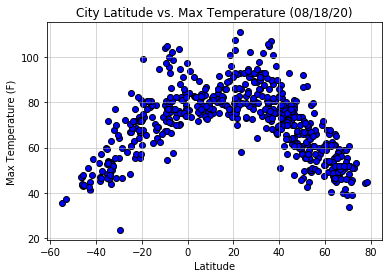

In [48]:
#scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "blue", edgecolor = "black")

#title
plt.title("City Latitude vs. Max Temperature (08/18/20)")

#set x axis label
plt.xlabel("Latitude")

#set y axis label
plt.ylabel("Max Temperature (F)")

#grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#save plot as png
plt.savefig("../Images/City Latitude vs Max Temperature.png")

Highest temperture is found at 20 latitude and as the latitude increases the temperature drop.

## Latitude vs. Humidity Plot

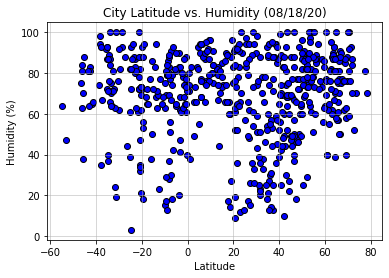

In [49]:
#create scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "blue", edgecolor = "black")

#title
plt.title("City Latitude vs. Humidity (08/18/20)")

#x axis
plt.xlabel("Latitude")

#y axis
plt.ylabel("Humidity (%)")

#grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#save plot as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

Polar regions have lower humidity and as latitude gets higher, humidity gets higher in southern hemisphere.

## Latitude vs. Cloudiness Plot

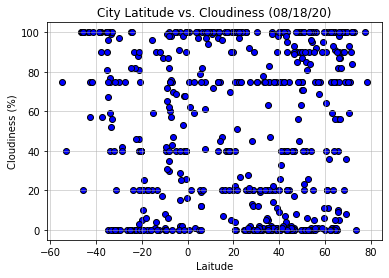

In [54]:
#scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "blue", edgecolor = "black")

#title
plt.title("City Latitude vs. Cloudiness (08/18/20)")

#x axis
plt.xlabel("Laitude")

#y axis
plt.ylabel("Cloudiness (%)")

#grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#save as png
plt.savefig("../Images/City Latitude vs Cloudiness.png")

Cloudiness data is widely spread across the latitude.

## Latitude vs. Wind Speed Plot

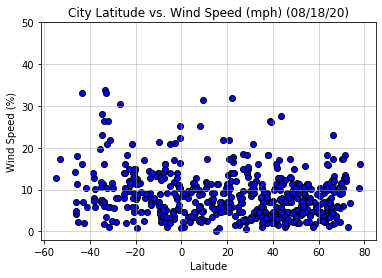

In [55]:
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "blue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (08/18/20)")

#x axis
plt.xlabel("Laitude")

#y axis
plt.ylabel("Wind Speed (%)")

#y axix limit
plt.ylim(-2,50)

#grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save as png
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

Wind speed data is widely spread across the latitude.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [57]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [58]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.74


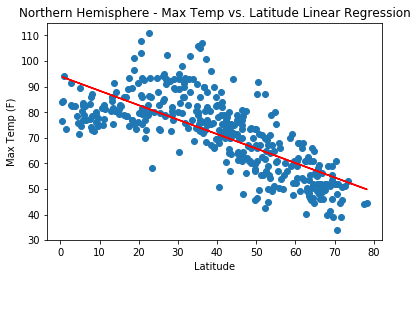

In [70]:
#function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

#function #2
annotate(equation, 0, 0)

#title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

#x
plt.xlabel("Latitude")

#y
plt.ylabel("Max Temp (F)")

#save as png
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a strong negative correlation between latitude and max temperature for nothern hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.79


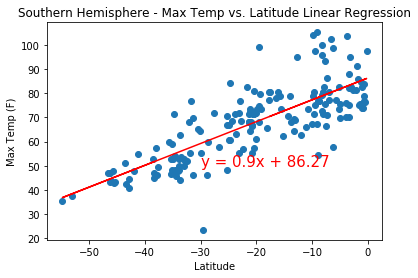

In [69]:
# function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# function #2
annotate(equation, -30, 50)

#title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

#x
plt.xlabel("Latitude")

#y
plt.ylabel("Max Temp (F)")

# Save as png
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a positive correlation between latitiude and max temperature for southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.06


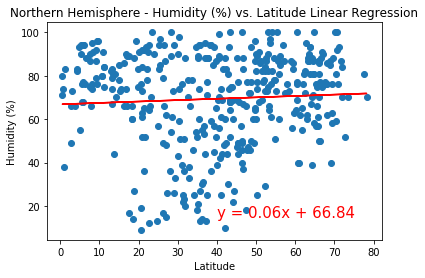

In [68]:
#function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

#function #2
annotate(equation, 40, 15)

#title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# x
plt.xlabel("Latitude")

# y
plt.ylabel("Humidity (%)")

# Save as png
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a positive correlation between latitude and humidity for northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.12


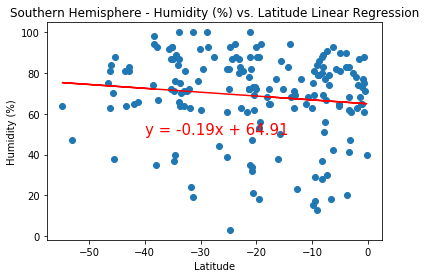

In [71]:
#function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

#function #2
annotate(equation, -40, 50)

#title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

#x
plt.xlabel("Latitude")

#y
plt.ylabel("Humidity (%)")

# Save as png
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a positive correlation between latitude and humidity for northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.02


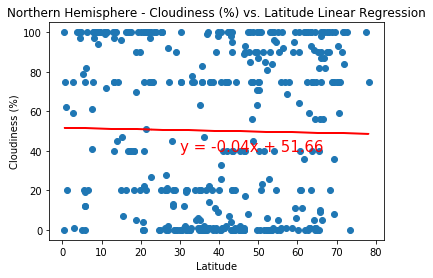

In [76]:
#function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

#function #2
annotate(equation, 30, 40)

#title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#x
plt.xlabel("Latitude")

#y
plt.ylabel("Cloudiness (%)")

# Save as png
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a weak positive correlation between latitude and cloudiness for northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.21


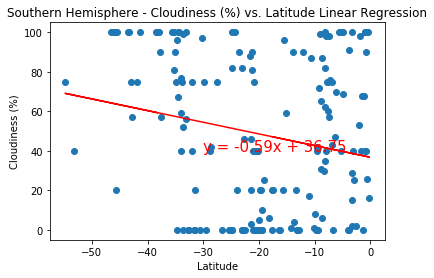

In [75]:
#function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

#function #2
annotate(equation, -30, 40)

#title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#x
plt.xlabel("Latitude")

#y
plt.ylabel("Cloudiness (%)")

# Save as png
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


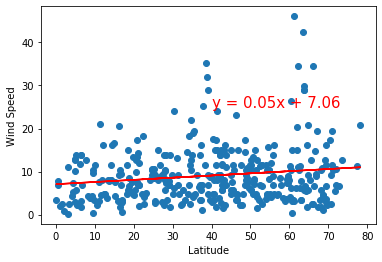

In [22]:
#function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

#function #2
annotate(equation, 40, 20)

#title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

#x
plt.xlabel("Latitude")

#y
plt.ylabel("Wind Speed (mph)")

# Save as png
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a weak positive correlation between latitude and windsoeed for northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.15


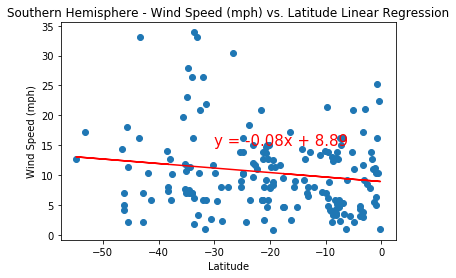

In [77]:
#function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

#function #2
annotate(equation, -30, 15)

#title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

#x
plt.xlabel("Latitude")

#y
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a weak negative correlation between latitude and wind speed for southern hemisphere.